In [2]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

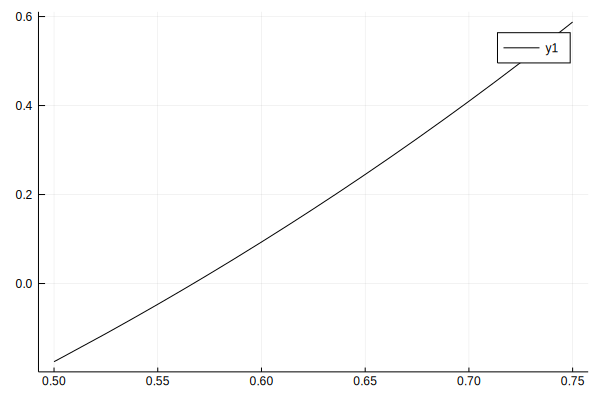

In [6]:
f(x) = exp(x) * x - 1
plot(f, 0.5, 0.75, c=:black)

In [9]:
f(x) = x * exp(x) - 1
a, b = 0.0, 1.0

(0.0, 1.0)

In [87]:
x = (a + b) / 2
if f(a) * f(x) < 0
    b = x
else
    a = x
end
x, f(x)

(0.567143290409784, 2.220446049250313e-16)

In [88]:
"""
    (x, fx, exitflag) = bisseccao(f, a, b)
"""
function bisseccao(f, a, b;
                   atol = 1e-8, rtol = 1e-8,
                   max_tempo = 10.0, max_iter = 1000,
                   )
    fa = f(a)
    fb = f(b)
    ϵ = atol + rtol * max(abs(fa), abs(fb))
    ϵba = atol + rtol * abs(b - a)
    if abs(fa) ≤ ϵ
        return a, fa, :sucesso
    elseif abs(fb) ≤ ϵ
        return b, fb, :sucesso
    elseif fa * fb ≥ 0
        return a, fa, :falha_sinais_opostos
    end
    
    x = (a + b) / 2
    fx = f(x)
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
    cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    while !(resolvido || cansado)
        if fa * fx < 0
            b = x
            fb = fx
        else
            a = x
            fa = fx
        end
        
        x = (a + b) / 2
        fx = f(x)
        
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ || abs(b - a) ≤ ϵba)
        cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    exitflag = :desconhecido
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    return x, fx, exitflag
end

bisseccao

In [89]:
f(x) = exp(x) * x - 1
a, b = 0.0, 1.0
bisseccao(f, a, b)

(0.5671432912349701, 2.2801733834398874e-9, :sucesso)

In [90]:
f(x) = (exp(x) * x - 1) * 1e8
a, b = 0.0, 1.0
bisseccao(f, a, b)

(0.5671432912349701, 0.22801733834398874, :sucesso)

In [91]:
f(x) = x^2 - 2
a, b = 1.0, 2.0
bisseccao(f, a, b)

(1.4142135679721832, 1.583661290993632e-8, :sucesso)

In [94]:
setprecision(512)
f(x) = x^2 - 2
a, b = big"1.0", big"2.0"
bisseccao(f, a, b, atol=1e-100, rtol=0.0)

(1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157270652639468506542033758106760787262467057165468733028807, -8.05746806671660898226333488788170328822662981957751925118139190326809864796976360221214459765968160100814326481116346523751935500304405689665295199347538888e-101, :sucesso)

In [95]:
sqrt(big"2")

1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586

In [101]:
n = 48
V = 40_000
p = 1200
function eq_price(i)
    if i == 0
        return p - V / n
    else
        return p - V * (1 + i)^n * i / ((1 + i)^n - 1)
    end
end
bisseccao(eq_price, 0.0, 1.0)

(0.015990912914276123, 0.0002747942044152296, :sucesso)

In [125]:
f(x) = x^2 - 2
fd(x) = 2x
x = 1.0
x = big"1"

1

In [133]:
x = x - f(x) / fd(x)
x, f(x)

(1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586, 0.0)

In [138]:
"""
    (x, fx, exitflag) = newton(f, x)
"""
function newton(f, fd, x;
                atol = 1e-8, rtol = 1e-8,
                max_tempo = 10.0, max_iter = 1000,
                )
    fx = f(x)
    ϵ = atol + rtol * abs(fx)
    
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    exitflag = :desconhecido
    resolvido = (abs(fx) ≤ ϵ)
    cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    
    while !(resolvido || cansado)
        fdx = fd(x)
        if abs(fdx) ≤ ϵ
            exitflag = :derivada_nula
            break
        end
        x = x - fx / fdx
        fx = f(x)
        
        iter += 1
        Δt = time() - t0
        resolvido = (abs(fx) ≤ ϵ)
        cansado   = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    
    if resolvido
        exitflag = :sucesso
    elseif cansado
        if iter ≥ max_iter
            exitflag = :max_iter
        else
            exitflag = :max_tempo
        end
    end
    
    return x, fx, exitflag
end

newton

In [146]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, 1.0)

(1.4142135623746899, 4.510614104447086e-12, :sucesso)

In [145]:
f(x) = x^2 - 2
fd(x) = 2x
newton(f, fd, big"1", atol=1e-100, rtol=0.0)

(1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993586, 0.0, :sucesso)

In [147]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, 1.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso)

In [148]:
f(x) = x * exp(x) - 1
fd(x) = exp(x) + x * exp(x)
newton(f, fd, 0.0)

(0.5671432965302959, 1.6912338640651114e-8, :sucesso)

In [151]:
using ForwardDiff

eq_price_der(i) = ForwardDiff.derivative(eq_price, i)
newton(eq_price, eq_price_der, 1.0)

(0.015990923866072523, -3.1130025490710977e-6, :sucesso)

## Fractal de $x^3 - x$

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/calculo-numerico/exemplo.gif
└ @ Plots /home/abel/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/calculo-numerico/exemplo.gif")
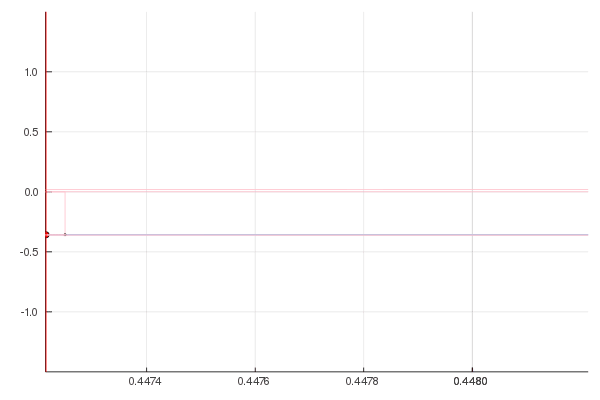

In [196]:
f(x) = x^3 - x
fd(x) = 3x^2 - 1

anim = Animation()
X = []
C = []
colors = [:red, :green, :blue]
r0 = sqrt(5) / 5
rf = r0 + 0.001
I = r0 .+ exp.(range(log(1e-6),
                     log(rf - r0 - 1e-4), length=100))
for x = I
    plot(f, r0, rf, leg=false)
    scatter!([x], [f(x)], c=:red, ms=4)
    push!(X, x)
    local x
    for k = 1:10
        xp = x - f(x) / fd(x)
        plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
        scatter!([xp], [f(xp)], c=:pink, ms=2)
        x = xp
    end
    j = argmin(abs.(x .- [-1, 0, 1]))
    push!(C, colors[j])
    for (xi,ci) in zip(X,C)
        plot!([xi, xi], [-1.5, 1.5], c=ci)
    end

    xlims!(r0, rf)
    ylims!(-1.5, 1.5)
    frame(anim)
end
gif(anim, "exemplo.gif", fps=10)

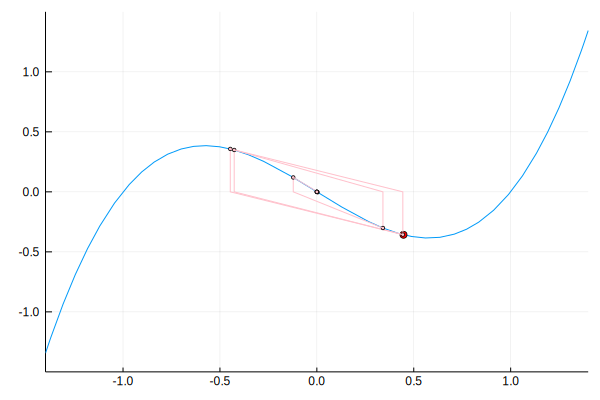

In [180]:
x = sqrt(3) / 3 - 0.115
x = sqrt(5) / 5 - 1e-4
plot(f, -1.4, 1.4, leg=false)
scatter!([x], [f(x)], c=:red, ms=4)
local x
for k = 1:10
    xp = x - f(x) / fd(x)
    plot!([x, xp, xp], [f(x), 0, f(xp)], c=:pink)
    scatter!([xp], [f(xp)], c=:pink, ms=2)
    x = xp
end

xlims!(-1.4, 1.4)
ylims!(-1.5, 1.5)